<center><h1>BUSS6002 - Data Science in Business</h1></center>

#### Pre-Tutorial Checklist

1. Complete Task 1 from week 8
2. Read entire tutorial


# Tutorial 11 - Optimisation

Optimisation is a fundamental component of modern Data Science and Machine Learning. The solutions to tasks such as regression and classification are most commonly found by solving an optimisation problem.

# Newton-Raphson Method 

The Newton-Raphson method is an algorithm to find the roots of a function.

To start lets look at functions with scalar inputs and scalar outputs e.g $f(x) = x^2 - 1$ or $f(x) = \sin(x)$ where where $x \in \mathbb{R}$ is a real number and $f$ outputs a real number too. 

The problem we are trying to solve here is to find the inputs $x$ such that $f(x) = 0$. For example, if our function is $f(x) = x - 2$, then the input $x = 2$ makes $f(x) = f(2) = 0$. Such an input $x$ is called the root of the function $f$.

Graphically, these are the places where the function crosses the x-axis.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

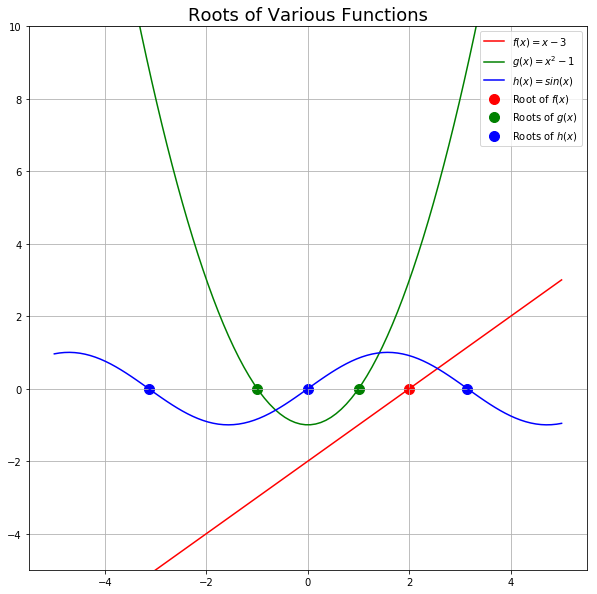

In [2]:
# THIS PLOT IS FOR ILLUSTRATION. YOU DON'T NEED TO READ THE CODE!
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)

y_1 = x - 2
y_2 = np.power(x, 2) - 1
y_3 = np.sin(x)

fig = plt.figure(figsize = (10,10))

plt.plot(x, y_1, color = "red", label = "$f(x) = x - 3$")
plt.scatter([2], [0], s = 100, color = "red", label = "Root of $f(x)$")

plt.plot(x, y_2, color = "green", label = "$g(x) = x^2 - 1$")
plt.scatter([1, -1], [0, 0], s = 100, color = "green", label = "Roots of $g(x)$")

plt.plot(x, y_3, color = "blue", label = "$h(x) = sin(x)$")
plt.scatter([-np.pi, 0, np.pi], [0, 0, 0], s = 100, color = "blue", label = "Roots of $h(x)$")

plt.ylim([-5, 10])
plt.legend()
plt.grid()
plt.title("Roots of Various Functions", fontsize = 18)

plt.show()

### Multiple Roots

With simple functions we can set $f(x) = 0$ and solve for $x$. Even with more complicated functions like $f(x) = x^2 - 1$, we can still find that both $x = 1$ and $x = -1$ makes $f(x)$ equal to $0$. While still pretty simple, this shows us that there may be multiple zeros of a function $f$, not just one. In fact, if you remember your trignometric functions, $f(x) = \sin(x)$ has infinitely many roots!

### Complicated Functions

Sometimes though, your function expression is too complicated for us to just rearrange the equation and solve for $x$.

For example, try solving $f(x) = x^5 - 3 x^4 + \exp(- x^2) \sin(10 x) = 0$ for $-1 < x < 1$. **Good luck!**

For your reference, we can visualise this function with the matlab code below.

Clearly, we can not easily solve this by rearranging the equation (analytically solving it). This is where Newton-Raphson comes in. **The Newton-Raphson method is a way of numerically solving for the roots of an equation, instead of analytically deriving it.**

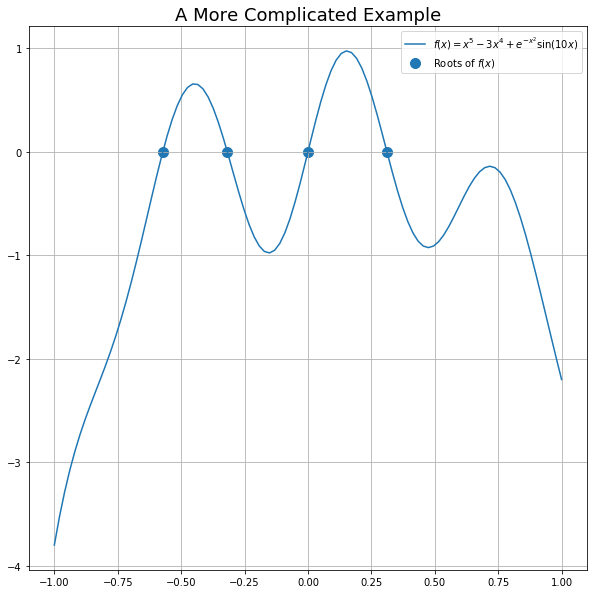

In [3]:
x = np.linspace(-1, 1, 100)

y_1 = x**5 -3*x**4 + np.exp(-x**2) * np.sin(10*x)

fig = plt.figure(figsize = (10,10))

plt.plot(x, y_1, label = "$f(x) = x^5 - 3x^4 + e^{-x^2} \sin(10x)$")
plt.scatter([ -0.572270586464421,  -0.317909632200591, 0, 0.311374273302995],
            [0, 0, 0, 0], s = 100, label = "Roots of $f(x)$")

plt.legend()
plt.grid()
plt.title("A More Complicated Example", fontsize = 18)

plt.show()

# How does Newton-Raphson work?

In cases where it is tedious or time consuming to calculate the roots manually we can use Newton-Raphson.

Newton-Raphson is an *iterative algorithm*. It finds a solution (root) in the following way:

1. Guess an answer $x_{0}$ for the root
2. Find the gradient (tangent) at the current guess
3. Find the zero crossing point of the tangent line
2. Set our new guess $x_1$ to the crossing point
3. Repeat 2 until we get stuck in a minimum or we are close enough to 0 

The update rule from some starting point $x_{i}$ to its improvement $x_{i + 1}$ is:

$$x_{i + 1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$$

<img src="img/NewtonIteration_Ani.gif">

*image from https://en.wikipedia.org/wiki/Newton%27s_method#/media/File:NewtonIteration_Ani.gif*

# Implementing Newton's Method

The code below illustrates how to find the roots of $f(x) = x^2 - 1$.

In [9]:
def f(x):
    # Calculates f(x) = x^2 - 1
    return np.power(x,2) - 1

def f_dx(x):
    # Calculates the value of the derivative of f
    # f'(x) = 2x
    return 2*x

def print_iteration(x):
    print("x = {0:.2f}, f(x) = {1:.2f}".format(x, f(x)))

x = 100 # Guess the solution - Initialisation

# Define the stopping criteria
error = np.inf
tol = 0.01

print_iteration(x) # Show the initial guess and function value

while error > tol:
    
    fx = f(x) # Calculate function value at x
    fx_dx = f_dx(x) # Calculate derivative value at x
    
    x = x  - (fx / fx_dx) # Update our value of x
    
    error = np.abs(fx - 0) # Calculate the error
    
    print_iteration(x)

x = 100.00, f(x) = 9999.00
x = 50.01, f(x) = 2499.50
x = 25.01, f(x) = 624.63
x = 12.53, f(x) = 155.91
x = 6.30, f(x) = 38.73
x = 3.23, f(x) = 9.44
x = 1.77, f(x) = 2.13
x = 1.17, f(x) = 0.36
x = 1.01, f(x) = 0.02
x = 1.00, f(x) = 0.00
x = 1.00, f(x) = 0.00


<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise  1 - Newton's Method</h3></div>

1. What is the final function value we have achieved? Have we arrived at the true answer?
2. What happens if you change the starting point to 5? 100? 10000?
3. What happens if you switch the starting point from 10 to -10?
4. What happens if you change the starting point to 0?
5. What happens if you change the starting point to 0.001?


# From Finding Roots to Finding Minimums

Root finding helps us optimise (minimise or maximise) functions. Consider linear regression where we find the best parameters by minimising the squared error of the model. The simple linear regression objective function is of the form:

$$ \min_{\beta_0, \beta_1} g(x) = \sum_{i=1}^n (y_i - \beta_0 + \beta_1 x_i)^2 $$

where $\beta$ are the model parameters (intercept and slope), $x$ is an observation and $y$ is the target value.

Now, let's say we want to minimise $g(x)$. You might remember that you can begin by finding the stationary point of the function. To find the stationary points, you first differentiate $g$ to get $g'$. Then you set the derivative, $g'$ to zero. So, we need to find values for $\beta$ where $g'(x) = 0$.

**This is a root finding process!**

Of course now we are finding roots of the first derivitive, not the original function. Often optimising a function $g$ can be boiled down to root-finding of $g'$. In order to find the roots of $g'$ we need to take the derivative of $g'$ to get the second derivative $g''$. The update rule now becomes 

$$x_{i + 1} = x_{i} - \frac{f'(x_{i})}{f''(x_{i})}$$

This new update rule implies that we must be able to calculate the second derivative of the objective function, sometimes this is infeasible.

More generally if you are optimising the parameters of a model

$$\theta_{i + 1} = \theta_{i} - \frac{f'(\theta_{i})}{f''(\theta_{i})}$$

In the case of simple linear regression $\theta = [\beta_0, \beta_1]^T$.

## Example

The following plot shows an illustration of the result when optimising $g(x) = x^2 - 1$. 

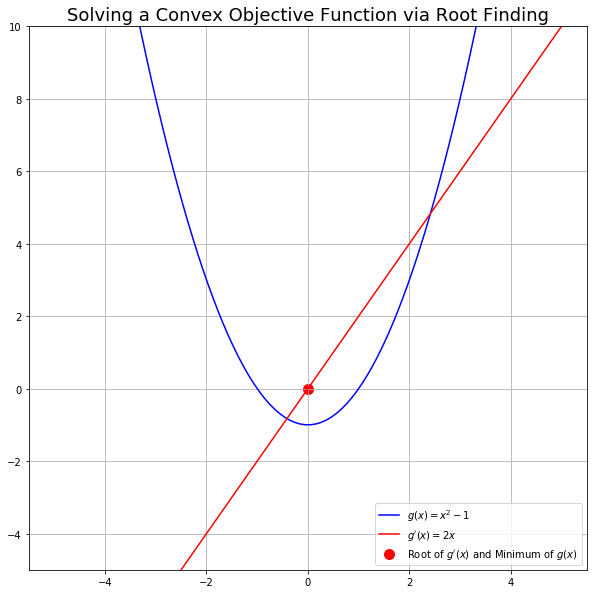

In [10]:
x = np.linspace(-5, 5, 100)

y_0 = np.zeros((100,1))
y_gx = np.power(x, 2) - 1
y_gdx = 2 * x

fig = plt.figure(figsize = (10,10))

plt.plot(x, y_gx, color = "blue", label = "$g(x) = x^2 - 1$")

plt.plot(x, y_gdx, color = "red", label = "$g'(x) = 2x$")
plt.scatter([0], [0], s = 100, color = "red", label = "Root of $g'(x)$ and Minimum of $g(x)$")

plt.ylim([-5, 10])
plt.legend()
plt.grid()
plt.title("Solving a Convex Objective Function via Root Finding", fontsize = 18)

plt.show()

# Gradient Descent

In some cases we can't calculate the second derivative or it is computationally expensive to evaluate the second derivative at each iteration. Gradient Descent (or Ascent) is a method that avoids these issues entirely when solving a minimisation (or maximisation) problem.

Gradient Descent is an *iterative algorithm*. It proceeds with the following steps

1. Guess an answer $\theta$ for the solution
2. Find the gradient at the current guess
3. Take a step in the direction of the negative gradient
4. Repeat 2 and 3 until stopping criteria are met

Therefore the update rule is:

$$\theta_{t+1} = \theta_{t} - \alpha \nabla f(\theta_t)$$

## Visualisation

<img src="img/gradient_descent.gif">

*image from https://medium.com/onfido-tech/machine-learning-101-be2e0a86c96a*

## Stopping Criteria

At what point should we terminate the algorithm? Here are two simple suggestions:

- Maximum number of iterations reached
- Function value is not changing much between iterations i.e. if the following condition is met then stop
$$f(\theta_t) - f(\theta_{t-1}) < \epsilon $$
    it is up to the user to define the value of $\epsilon$.

More advanced stopping criteria are used for solving specific objective functions. These stopping criteria are  usually related to the KKT Conditions (https://en.wikipedia.org/wiki/Karush–Kuhn–Tucker_conditions) of the problem. This is out of the scope of BUSS6002 but keep in mind that for specific problems there might be more precise stopping criteria available.

## Example

Consider a simple linear regression model without an intercept.

$$y = \beta_1 x$$

Given a training data set we can find an estimate $\hat{\beta_1}$ for $\beta_1$ by

$$\hat{\beta_1} = \min_{\beta_1} \sum_{i=1}^N (\beta_1 x_i - y_i)^2 $$

where

$$\nabla f(\beta_1) = \nabla \sum_{i=1}^N (\beta_1 x_i - y_i)^2 = \sum_{i=1}^N 2x_i(\beta_1 x_i - y_i)$$

Therefore the update rule is 

$$\hat{\beta_{1}}^{t+1} = \hat{\beta_{1}}^{t} - \alpha \sum_{i=1}^N 2x_i(\hat{\beta_{1}}^{t} x_i - y_i)$$


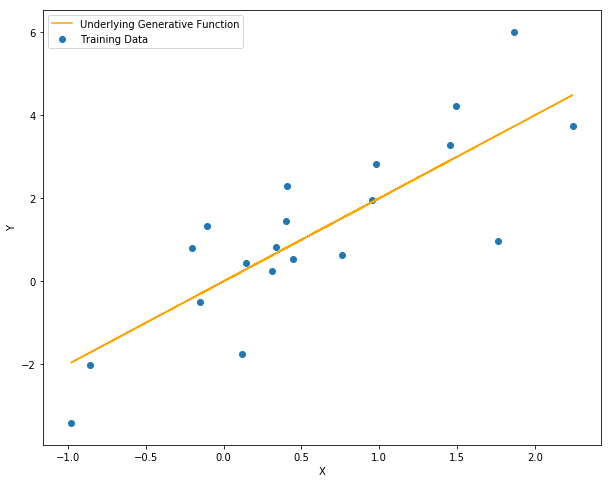

In [11]:
# THIS CELL IS USED TO GENERATE SOME SYNTHETIC DATA

beta_1_true = 2

np.random.seed(0)

N = 20
noise_variance = 1

x = np.random.randn(N)
y = beta_1_true * x + (np.random.randn(N) * noise_variance) 

plt.figure(figsize = (10, 8))

plt.plot(x, beta_1_true*x, label = "Underlying Generative Function", color = "orange")
plt.scatter(x, y, label = "Training Data")

plt.xlabel("X")
plt.ylabel("Y")

plt.legend()
plt.show()

In [18]:
def f(x, y, beta):
    return np.sum((x*beta - y)**2)

def gradient_f(x, y, beta):
    return 2 * np.sum(x*(x*beta - y))

beta =  10
f_past = f(x, y, beta)

alpha = 0.001

tol = 1e-6

max_iterations = 1000

for i in range(max_iterations):
    
    beta_next = beta - alpha * gradient_f(x, y, beta)
    
    f_next = f(x, y, beta_next)
    
    f_change = abs(f_past - f_next)
    
    if f_change < tol:
        print("Terminating Early")
        break
        
    beta = beta_next
    f_past = f_next

print(beta_next)

Terminating Early
1.1951495944761312


# Stochastic Gradient Descent

Stochastic Gradient Descent is a variant where at each iteration we only use a subset of the full training data i.e. in the example above our update rule would become

$$\hat{\beta_{1}}^{t+1} = \hat{\beta_{1}}^{t} - \alpha \sum_{i \in \Omega_{t}} 2x_i(\hat{\beta_{1}}^{t} x_i - y_i)$$

where $\Omega_{t}$ is a set of indices for the current subset of observations at iteration $t$.